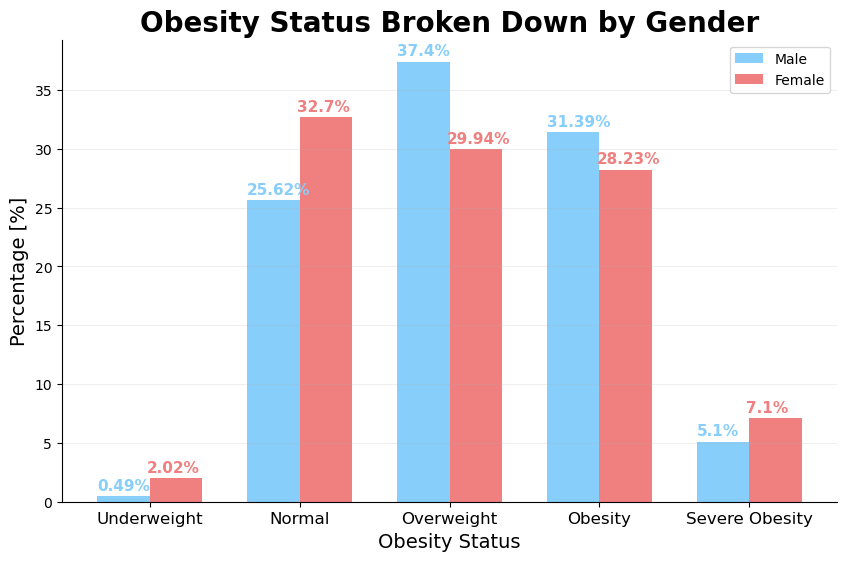

In [1]:
#This code prepared separates the NHANES dataset into male and females
#for future use throughout the project and compares overall obesity levels
#in males and females. Additionally, I add a column to the dataset that
#assigns an obesity status to the column based on BMI. 

#Female vs male weight classes from NHANES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

nhanes = pd.read_csv("NHANES.csv")
nhanes = nhanes[["Gender", "Age", "Race3", "Education","Weight","BMI", "HHIncomeMid", "Poverty"]]
nhanes = nhanes.dropna()

#This code creates weight statuses accroding to BMI. 
#It will be used to compare amount of obese women compared to men 
#Make a two way frequency to compare the weight statuses per gender
def function(row):
    if row['BMI'] >= 40:
        return 'Severe Obesity'
    elif row['BMI'] >= 30:
        return 'Obesity'
    elif row['BMI'] >= 25:
        return 'Overweight'
    elif row['BMI'] >= 18.5:
        return 'Normal'
    elif row['BMI'] < 18.5:
        return 'Underweight'
    else:
        return 'NaN'
    
#create a column to add the data to the end of the nhanes df
nhanes["Obesity"] = nhanes.apply(function, axis=1)

#This code sorts the data by gender in order to see how they differ by weight, education level, and income 
male_nhanes = nhanes["Gender"] == "male"
female_nhanes = nhanes["Gender"] == "female"
adult = nhanes['Age'] >= 20

male_nhanes_df = nhanes[male_nhanes & adult & ["BMI"] & ["Race3"] & ["Education"] & ["Weight"] & ["BMI"] & ["HHIncomeMid"] & ["Obesity"]&["Poverty"]]
female_nhanes_df = nhanes[female_nhanes & adult & ["BMI"] & ["Race3"] & ["Education"] & ["Weight"] & ["BMI"] & ["HHIncomeMid"] & ["Obesity"]&["Poverty"]]
adult_nhanes = nhanes[adult & ["BMI"] & ["Race3"] & ["Education"] & ["Weight"] & ["BMI"] & ["HHIncomeMid"] & ["Obesity"]&["Poverty"]]

#create the frequency table to see men vs women
two_way_frequency = pd.crosstab(index=adult_nhanes["Obesity"], columns=adult_nhanes["Gender"]) 
two_way_frequency = two_way_frequency.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])

#easier to compare with percentages
two_way_frequency['female percentage'] = 100*two_way_frequency['female'] / sum(two_way_frequency['female'])
two_way_frequency['male percentage'] = 100*two_way_frequency['male'] / sum(two_way_frequency['male'])

#save the df as a csv file for later 
two_way_frequency.to_csv('Gender_BMI_Table.csv')

#create a grouped bar chart to compare weight statuses of men and women
with plt.style.context('default'):

    Gender_BMI_Table = pd.read_csv('Gender_BMI_Table.csv')

    labels = Gender_BMI_Table['Obesity']
    y_value1 = Gender_BMI_Table['male percentage'] # List of y-values from 1st category
    y_value2 = Gender_BMI_Table['female percentage'] # List of y-values from 2nd category

    rounded_m = Gender_BMI_Table['male percentage'].round(decimals=2)
    rounded_f = Gender_BMI_Table['female percentage'].round(decimals=2)

    x = np.arange(len(labels))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x - width/2, y_value1, width, label='Male', color='lightskyblue')
    ax.bar(x + width/2, y_value2, width, label='Female', color='lightcoral')

    ax.set_ylabel('Percentage [%]', fontsize=14)
    ax.set_xlabel('Obesity Status', fontsize=14)
    ax.set_title('Obesity Status Broken Down by Gender',
                 fontsize=20, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.legend()

    #special details 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.grid(axis='y', alpha=0.2)

    for i in range(len(labels)):
        plt.text(i-0.35, rounded_m[i]+0.5, str(rounded_m[i])+"%", color='lightskyblue', size=11, fontweight='bold')
        plt.text(i-0.02, rounded_f[i] + 0.5, str(rounded_f[i])+"%", color='lightcoral', size=11, fontweight='bold')


    plt.show()

In [2]:
#This code measures the sample proportiion of obese males and 
#obese females and finds their respective 95% confidence intervals. 

def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up)) 
    
male_obese = CI_prop(517,1648)
female_obese = CI_prop(461,1637)

Sample proportion is: 0.3137135922330097
95% CI is: (0.2913110742649323, 0.3361161102010871)
Sample proportion is: 0.28161270616982287
95% CI is: (0.25982371234475204, 0.3034016999948937)


In [3]:
#This code performs a two sample t-test to see if there is a significant 
#difference between amount of obese males and obese females according to BMI

#Need 95% CI population mean differnence
#s1, s2, are amount of obese males and females 
#n1, n2 are sample sizes 

def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1/n1 #proportion for male 
    p2 = s2/n2 #proportion for female
    se12 = p1*(1-p1)/n1 #standard error of male
    se22 = p2*(1-p2)/n2 #standard error of female 
    sed2 = se12 + se22 #add up standard error
    sed = np.sqrt(sed2) #sqrt of SEs to find SE for difference 
    
    diff = p1-p2 
    low = diff - 1.96 * sed
    up = diff + 1.96 * sed
    return "the SE difference is", sed, "the average difference is", diff, "the 95% CI is", low, up

# #Perform the Difference in Population Proportions Hypothesis Test
import scipy.stats.distributions as dist

prop_m_obese = 517/1648
prop_f_obese = 461/1637
obese_SE_diff = 0.0159

best_estimate = (prop_m_obese - prop_f_obese)
print("The best estimate is", best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate - hypothesized_estimate)/obese_SE_diff
print("Computed test statistic is:", test_stat) 
#this will find how many SEs above the hypothesized mean 
#now convert it to a p-value 
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

#Using obese numbers for men and women 
CI_prop_diff(517, 461,1648, 1637)

The best estimate is 0.03210088606318684
Computed test statistic is: 2.018923651772757
Computed P-value is 0.043495155511612565


('the SE difference is',
 0.01594445356689293,
 'the average difference is',
 0.03210088606318684,
 'the 95% CI is',
 0.0008497570720766984,
 0.06335201505429698)

In [4]:
#Short Summary of above results:
#Since the P value is <0.05, we can reject the null hypothesis in favor 
#of the alternative and say that there is a significant difference in 
#obese men than women. Furthermore, we can conclude that men, in general, 
#are more likely to be obese than women. 

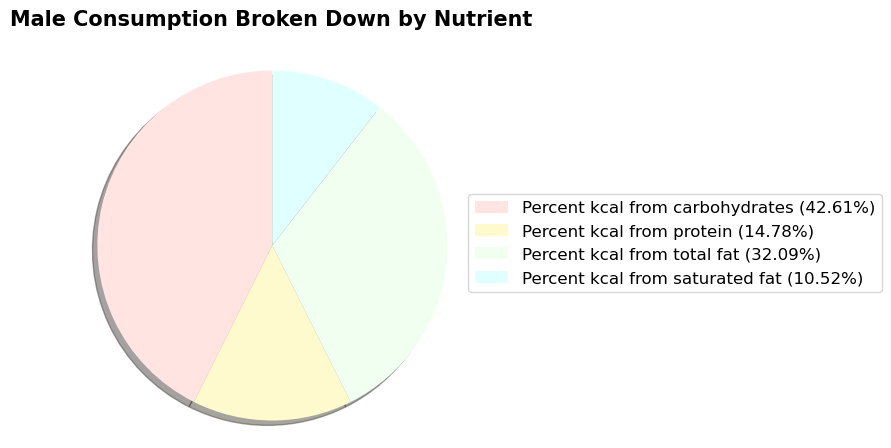

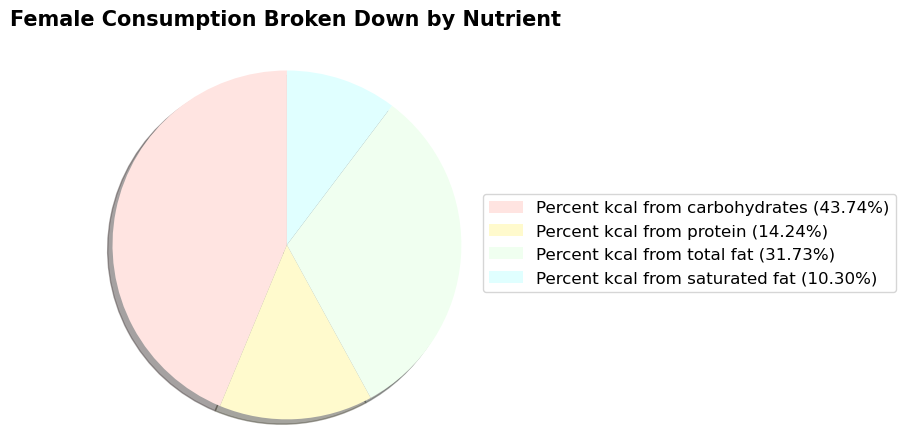

In [5]:
#The second part of this project measures food consumption divided by nutrient
#in males and females to see if that could explain differences in obesity level. 
#The nutrients are divided by % kcal from carbs, protein, total fat, saturated fat
#and the data is from 2013-2016 for men and women ages 20+. The code used creates
#two datasets for males andd females and then graphs the percentages in two
#different pie charts. 

consumption = pd.read_csv("Consumption.csv")

#This code sorts the data by gender in order to see how they differ in consumption 
male_consumption = consumption["Gender"] == "Male"
female_consumption = consumption["Gender"] == "Female"
year = consumption["Year"] == "2013-2016"

male_consumption_df = consumption[male_consumption & year & ["Percent kcal from carbohydrates"] & 
                                  ["Percent kcal from protein"] & ["Percent kcal from total fat"] & 
                                  ["Percent kcal from saturated fat"]]
female_consumption_df = consumption[female_consumption & year & ["Percent kcal from carbohydrates"] & 
                                  ["Percent kcal from protein"] & ["Percent kcal from total fat"] & 
                                    ["Percent kcal from saturated fat"]]

#Find the mean of each gender 
male_carb = np.mean(male_consumption_df["Percent kcal from carbohydrates"])
male_prot = np.mean(male_consumption_df["Percent kcal from protein"])
male_tfat = np.mean(male_consumption_df["Percent kcal from total fat"])
male_sfat = np.mean(male_consumption_df["Percent kcal from saturated fat"])
female_carb = np.mean(female_consumption_df["Percent kcal from carbohydrates"])
female_prot = np.mean(female_consumption_df["Percent kcal from protein"])
female_tfat = np.mean(female_consumption_df["Percent kcal from total fat"])
female_sfat = np.mean(female_consumption_df["Percent kcal from saturated fat"])

#Put those mean averages into a dataset 
male_mean_consumption = {"Nutrients": ["Percent kcal from carbohydrates", "Percent kcal from protein",
                                    "Percent kcal from total fat","Percent kcal from saturated fat"],
                         "Percents": [male_carb, male_prot, male_tfat, male_sfat]}
male_mean_consumption_df = pd.DataFrame (male_mean_consumption, columns = ["Nutrients", "Percents"])

female_mean_consumption = {"Nutrients": ["Percent kcal from carbohydrates", "Percent kcal from protein",
                                    "Percent kcal from total fat","Percent kcal from saturated fat"],
                         "Percents": [female_carb, female_prot, female_tfat, female_sfat]}
female_mean_consumption_df = pd.DataFrame (female_mean_consumption, columns = ["Nutrients", "Percents"])

#Create pie graphs for men and women to compare their consumptions 

#This pie graph is for men 
x_values = male_mean_consumption_df['Nutrients']
y_values = male_mean_consumption_df['Percents']
colors = ["mistyrose", "lemonchiffon", "honeydew", "lightcyan"]

percent = y_values / sum(y_values) * 100
label = [[] for i in range(len(x_values))]
for i in range(len(x_values)):
    label[i] = '{} ({:.2f}%)'.format(x_values[i],percent[i])

with plt.style.context('default'):

    fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
    pie = axs.pie(y_values, shadow=True, startangle=90, colors=colors)
    axs.axis('equal')
    plt.legend(pie[0],label, bbox_to_anchor=(1.75,0.5), loc="right", fontsize=12, 
               bbox_transform=plt.gcf().transFigure)
    plt.title('Male Consumption Broken Down by Nutrient',fontweight="bold", fontsize=15, pad=20)
    plt.show()

# #This pie graph is for women 
x_values = female_mean_consumption_df['Nutrients']
y_values = female_mean_consumption_df['Percents']
colors = ["mistyrose", "lemonchiffon", "honeydew", "lightcyan"]

percent = y_values / sum(y_values) * 100
label = [[] for i in range(len(x_values))]
for i in range(len(x_values)):
    label[i] = '{} ({:.2f}%)'.format(x_values[i],percent[i])

with plt.style.context('default'):

    fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
    pie = axs.pie(y_values, shadow=True, startangle=90, colors = colors)
    axs.axis('equal')
    plt.legend(pie[0],label, bbox_to_anchor=(1.75,0.5), loc="right", fontsize=12, 
               bbox_transform=plt.gcf().transFigure)
    plt.title('Female Consumption Broken Down by Nutrient',fontweight="bold", fontsize=15, pad=20)

    plt.show()

In [6]:
#Statistical Analysis for Consumption Broken Down by Nutrient 
#This code finds the confidence intervals for the percentages
#above for males. 
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))
    
CI_mean(male_consumption_df["Percent kcal from carbohydrates"])
CI_mean(male_consumption_df["Percent kcal from protein"])
CI_mean(male_consumption_df["Percent kcal from total fat"])
CI_mean(male_consumption_df["Percent kcal from saturated fat"])

Average is: 46.575
95% CI of mean is: (45.7929164047239, 47.35708359527611)
Average is: 16.15
95% CI of mean is: (15.748917714178248, 16.55108228582175)
Average is: 35.075
95% CI of mean is: (34.3371472030276, 35.81285279697241)
Average is: 11.5
95% CI of mean is: (11.090036586998304, 11.909963413001696)


In [7]:
#This code finds the confidence intervals for the percentages
#above for females. 
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))
    
CI_mean(female_consumption_df["Percent kcal from carbohydrates"])
CI_mean(female_consumption_df["Percent kcal from protein"])
CI_mean(female_consumption_df["Percent kcal from total fat"])
CI_mean(female_consumption_df["Percent kcal from saturated fat"])

Average is: 48.525000000000006
95% CI of mean is: (47.44394183782741, 49.6060581621726)
Average is: 15.8
95% CI of mean is: (15.300296087667908, 16.29970391233209)
Average is: 35.2
95% CI of mean is: (34.867665830826866, 35.53233416917314)
Average is: 11.425
95% CI of mean is: (11.201794377310964, 11.648205622689037)


In [8]:
#The following four codes finds if there is a significant difference between 
#the percentage of nutrients eaten by males and females. Results could 
#suggest whether a difference in consumption leads to higher obesity levels 

#First for carbs: 
#Need to find the CI for mean difference and will use in all of the analyses
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))
    
CI_mean_diff(male_consumption_df["Percent kcal from carbohydrates"],
             female_consumption_df["Percent kcal from carbohydrates"])

#Now perform the hypothesis test
from scipy import stats

t_val, p_val = stats.ttest_ind(male_consumption_df["Percent kcal from carbohydrates"],
                               female_consumption_df["Percent kcal from carbohydrates"], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

The average difference is: -1.9500000000000028
The 95% CI is: (-3.284294382810632, -0.6157056171893738)
Test statistic: -2.4806737822667557
p-value: 0.05166765177970363


In [9]:
#Now for protein: find the CI for mean difference 
CI_mean_diff(male_consumption_df["Percent kcal from protein"],
             female_consumption_df["Percent kcal from protein"])

#Now perform the hypothesis test
from scipy import stats

t_val, p_val = stats.ttest_ind(male_consumption_df["Percent kcal from protein"],
                               female_consumption_df["Percent kcal from protein"], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

The average difference is: 0.34999999999999787
The 95% CI is: (-0.2907581447004808, 0.9907581447004765)
Test statistic: 0.9271726499455255
p-value: 0.3912083070361545


In [10]:
#Now for total fat: find the CI for mean difference 
CI_mean_diff(male_consumption_df["Percent kcal from total fat"],
             female_consumption_df["Percent kcal from total fat"])

#Now perform the hypothesis test
from scipy import stats

t_val, p_val = stats.ttest_ind(male_consumption_df["Percent kcal from total fat"],
                               female_consumption_df["Percent kcal from total fat"], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

The average difference is: -0.125
The 95% CI is: (-0.9342420836807744, 0.6842420836807744)
Test statistic: -0.26219128763314
p-value: 0.8056225201819991


In [11]:
#Now for saturated fat: find the CI for mean difference 
CI_mean_diff(male_consumption_df["Percent kcal from saturated fat"],
             female_consumption_df["Percent kcal from saturated fat"])

#Now perform the hypothesis test
from scipy import stats

t_val, p_val = stats.ttest_ind(male_consumption_df["Percent kcal from saturated fat"],
                               female_consumption_df["Percent kcal from saturated fat"], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

The average difference is: 0.07499999999999929
The 95% CI is: (-0.39178769263981306, 0.5417876926398116)
Test statistic: 0.27272727272727015
p-value: 0.7967919566327726


In [12]:
#Short analysis: none of the p-values from above are significant, so we cannot
#say there is a difference in nutrient consumption between males and females that
#could lead to differences in obesity between the two genders. 

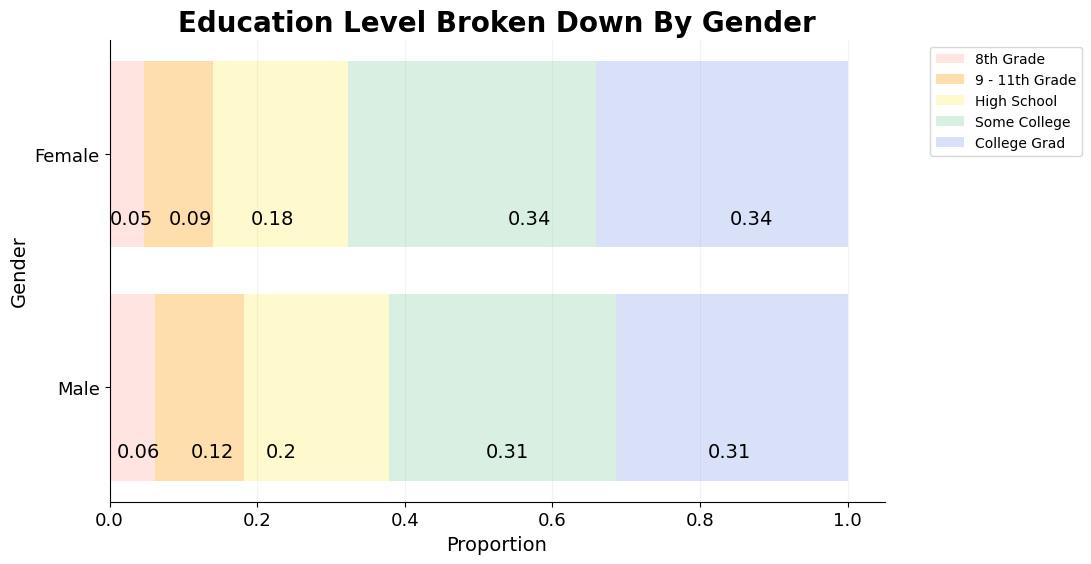

In [13]:
#Looking at obesity by education level  
#Using the same NHANES dataset, we can look at obesity by education level 
#to see if there are correlations. This code first creates a stacked bar chart
#to look at differences in education between males and females and then to see 
#if there is a statistically statistically significant relationship between 
#education level and obesity level. I decided to use college as an education 
#benchmark based to see if there is a difference in obesity between education up 
#until college and after college. 

#Are Males more likely to get educated than females?
gender_ed = pd.crosstab(index=nhanes["Education"], columns=nhanes["Gender"])
gender_ed = gender_ed.reindex(["8th Grade","9 - 11th Grade", "High School",'Some College','College Grad'])

#Turn numbers into %
gender_ed['Female_per'] = gender_ed["female"] / sum(gender_ed["female"])
gender_ed['Male_per'] = gender_ed['male'] / sum(gender_ed['male'])

gender_ed.to_csv('gender_ed.csv')
gender_ed = pd.read_csv('gender_ed.csv')
gender_ed.index = gender_ed["Education"]

#Only get the colummns I need
new_gender_ed = gender_ed[["Male_per", "Female_per"]]

#Stacked Bar Chart:
with plt.style.context('default'):

    label = ['Male', 'Female']
    y_value1 = new_gender_ed.loc['8th Grade']
    y_value2 = new_gender_ed.loc['9 - 11th Grade']
    y_value3 = new_gender_ed.loc['High School']
    y_value4 = new_gender_ed.loc['Some College']
    y_value5 = new_gender_ed.loc['College Grad']

    rounded_1 = new_gender_ed.loc['8th Grade'].round(decimals=2)
    rounded_2 = new_gender_ed.loc['9 - 11th Grade'].round(decimals=2)
    rounded_3 = new_gender_ed.loc['High School'].round(decimals=2)
    rounded_4 = new_gender_ed.loc['Some College'].round(decimals=2)
    rounded_5 = new_gender_ed.loc['College Grad'].round(decimals=2)


    fig, axs = plt.subplots(figsize=(10,6)) 
    p1 = axs.barh(label, y_value1, color = "mistyrose")     
    p2 = axs.barh(label, y_value2, left=y_value1, color = "navajowhite")
    p3 = axs.barh(label, y_value3, left=y_value1+y_value2, color = "lemonchiffon")
    p4 = axs.barh(label, y_value4, left=y_value1+y_value2+y_value3, color = "mediumseagreen", alpha=0.2)
    p5 = axs.barh(label, y_value5, left=y_value1+y_value2+y_value3+
                y_value4, color = "royalblue", alpha=0.2)

    axs.set_title("Education Level Broken Down By Gender", 
                  fontsize=20, fontweight="bold")   
    axs.set_xlabel("Proportion", fontsize=14)
    axs.set_ylabel("Gender", fontsize=14)
    axs.tick_params(labelsize=13)  
    axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
               (gender_ed.index),
              bbox_to_anchor=(1.05, 1))

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

    plt.grid(axis='x', alpha = 0.15)

    for i in range(len(label)):
        plt.text(rounded_1[i]-0.05, i-0.3, str(rounded_1[i]), color='black', size=14)
        plt.text(rounded_2[i]-.01, i-0.3, str(rounded_2[i]), color='black', size=14)
        plt.text(rounded_3[i]+0.011, i-0.3, str(rounded_3[i]), color='black', size=14)
        plt.text(rounded_4[i]+0.2, i-0.3, str(rounded_4[i]), color='black', size=14)
        plt.text(rounded_5[i]+0.5, i-0.3, str(rounded_5[i]), color='black', size=14)

    plt.show() 

In [14]:
#This code looks at if there a correlation between education level and gender?
#by performing a chi-squared test  
#Null hypothesis: There is no association between education level and gender
#Alt hypothesis: There is an association between education level and gender

gender_ed
drop_gender_ed = gender_ed.drop(columns=["Female_per", "Male_per","Education"])

total = 0
for gender in drop_gender_ed.columns:
    total += np.sum(drop_gender_ed[gender])

from scipy import stats

print(total)

chi2, p, dof, expected = stats.chi2_contingency(drop_gender_ed)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#The chi square test shows us that there is a significant difference in education level between males and females. 
#Furthermore, we can conclude from the data that females are more likely to get a college degree or attend some college,
#which could suggest why females have overall lower obesity rates than men. 

3280
chi2: 13.716200901521322
p: 0.008258142906420905
dof: 4
expected: [[ 88.62012195  89.37987805]
 [174.25304878 175.74695122]
 [310.17042683 312.82957317]
 [525.24847561 529.75152439]
 [534.70792683 539.29207317]]


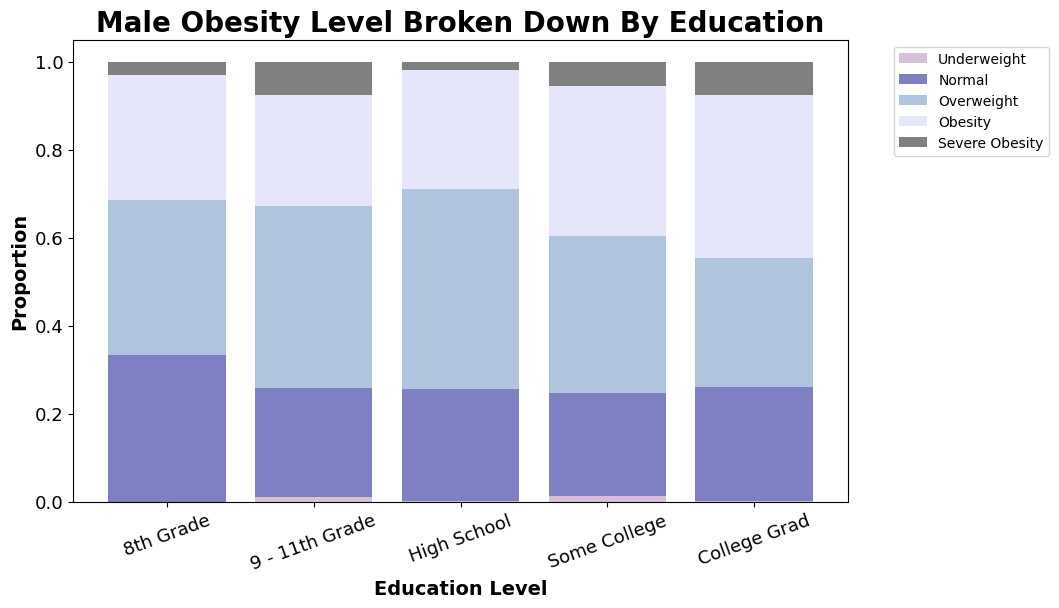

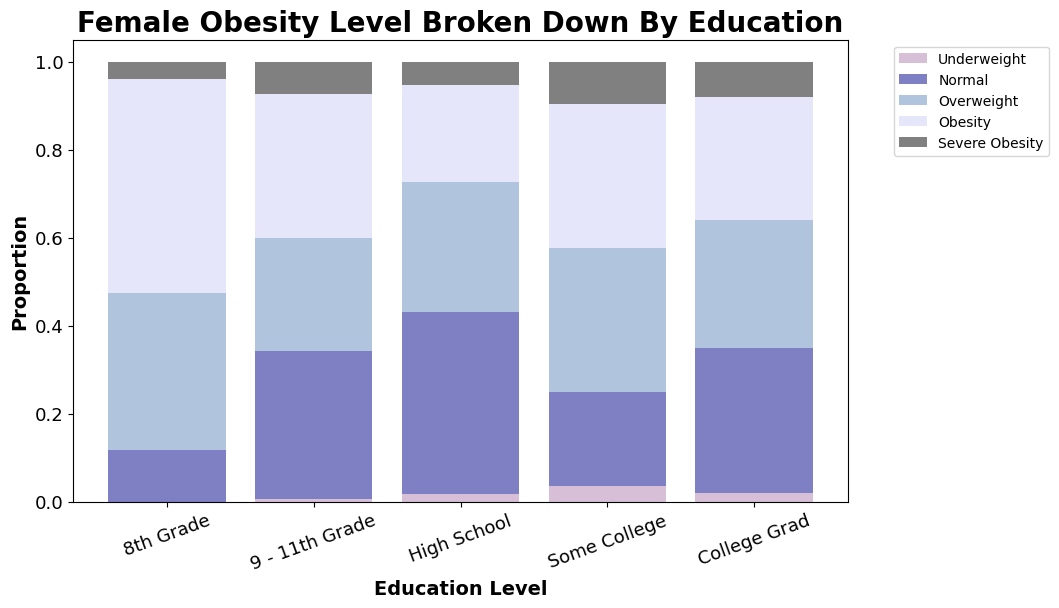

In [15]:
#Looking at obesity by education level  
#Using the same NHANES dataset, we can look at obesity by education level to see if there are correlations there 
#Goal: another stacked bar chart

#Create a two way frequency for male and female to see distrbution of weight classes per race per gender
male_ed_two_way_frequency = pd.crosstab(index=male_nhanes_df["Obesity"], columns=nhanes["Education"]) 
female_ed_two_way_frequency = pd.crosstab(index=female_nhanes_df["Obesity"], columns=nhanes["Education"]) 


#Turn the numbers into percentages for both male and female two way frequencies 
male_ed_two_way_frequency['8th_Grade_per'] = male_ed_two_way_frequency['8th Grade'] / sum(male_ed_two_way_frequency['8th Grade'])
male_ed_two_way_frequency['9-11th_Grade_per'] = male_ed_two_way_frequency['9 - 11th Grade'] / sum(male_ed_two_way_frequency['9 - 11th Grade'])
male_ed_two_way_frequency['College_Grad_per'] = male_ed_two_way_frequency['College Grad'] / sum(male_ed_two_way_frequency['College Grad'])
male_ed_two_way_frequency['High_School_per'] = male_ed_two_way_frequency['High School'] / sum(male_ed_two_way_frequency['High School'])
male_ed_two_way_frequency['Some_College'] = male_ed_two_way_frequency['Some College'] / sum(male_ed_two_way_frequency['Some College'])
 
female_ed_two_way_frequency['8th_Grade_per'] = female_ed_two_way_frequency['8th Grade'] / sum(female_ed_two_way_frequency['8th Grade'])
female_ed_two_way_frequency['9-11th_Grade_per'] = female_ed_two_way_frequency['9 - 11th Grade'] / sum(female_ed_two_way_frequency['9 - 11th Grade'])
female_ed_two_way_frequency['College_Grad_per'] = female_ed_two_way_frequency['College Grad'] / sum(female_ed_two_way_frequency['College Grad'])
female_ed_two_way_frequency['High_School_per'] = female_ed_two_way_frequency['High School'] / sum(female_ed_two_way_frequency['High School'])
female_ed_two_way_frequency['Some_College'] = female_ed_two_way_frequency['Some College'] / sum(female_ed_two_way_frequency['Some College'])
 
#Reindex the tables
male_ed_two_way_frequency = male_ed_two_way_frequency.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])
female_ed_two_way_frequency = female_ed_two_way_frequency.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])

#save the df as a csv file for later 
male_ed_two_way_frequency.to_csv('Ed_Gender_BMI_M.csv')
female_ed_two_way_frequency.to_csv('Ed_Gender_BMI_F.csv')

#create a stacked bar chart to compare weight statuses of men and women per race
#First male:
Ed_Gender_BMI_M = pd.read_csv('Ed_Gender_BMI_M.csv')
Ed_Gender_BMI_M.index = Ed_Gender_BMI_M["Obesity"]

Ed_Gender_BMI_F = pd.read_csv('Ed_Gender_BMI_F.csv')
Ed_Gender_BMI_F.index = Ed_Gender_BMI_F["Obesity"]

#Only get the colummns I need
new_Ed_Gender_BMI_M = Ed_Gender_BMI_M[["8th_Grade_per", "9-11th_Grade_per", "College_Grad_per", "High_School_per", "Some_College"]]
new_Ed_Gender_BMI_F = Ed_Gender_BMI_F[["8th_Grade_per", "9-11th_Grade_per", "College_Grad_per", "High_School_per", "Some_College"]]

#Stacked Bar Chart for Males:
with plt.style.context('default'):

    label = ['8th Grade', '9 - 11th Grade','High School', 'Some College', 'College Grad']
    y_value1 = new_Ed_Gender_BMI_M.loc['Underweight']
    y_value2 = new_Ed_Gender_BMI_M.loc['Normal']
    y_value3 = new_Ed_Gender_BMI_M.loc['Overweight']
    y_value4 = new_Ed_Gender_BMI_M.loc['Obesity']
    y_value5 = new_Ed_Gender_BMI_M.loc['Severe Obesity']

    fig, axs = plt.subplots(figsize=(10,6)) 
    p1 = axs.bar(label, y_value1, color = "thistle")     
    p2 = axs.bar(label, y_value2, bottom=y_value1, color = "darkblue", alpha=0.5)
    p3 = axs.bar(label, y_value3, bottom=y_value1+y_value2, color = "lightsteelblue")
    p4 = axs.bar(label, y_value4, bottom=y_value1+y_value2+y_value3, color = "lavender")
    p5 = axs.bar(label, y_value5, bottom=y_value1+y_value2+y_value3+
                y_value4, color = "gray")
    axs.set_title("Male Obesity Level Broken Down By Education", 
                  fontsize=20, fontweight="bold")   
    axs.set_xlabel("Education Level", fontsize=14, fontweight="bold")
    axs.set_ylabel("Proportion", fontsize=14, fontweight="bold")
    axs.tick_params(labelsize=13)  
    plt.xticks(rotation = 20, horizontalalignment="center")
    axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
               (new_Ed_Gender_BMI_M.index),
              bbox_to_anchor=(1.05, 1))
    plt.show() 

#Stacked Bar Chart for Females:
with plt.style.context('default'):

    label = ['8th Grade', '9 - 11th Grade','High School', 'Some College', 'College Grad']
    y_value1 = new_Ed_Gender_BMI_F.loc['Underweight']
    y_value2 = new_Ed_Gender_BMI_F.loc['Normal']
    y_value3 = new_Ed_Gender_BMI_F.loc['Overweight']
    y_value4 = new_Ed_Gender_BMI_F.loc['Obesity']
    y_value5 = new_Ed_Gender_BMI_F.loc['Severe Obesity']

    fig, axs = plt.subplots(figsize=(10,6))      
    p1 = axs.bar(label, y_value1, color = "thistle")     
    p2 = axs.bar(label, y_value2, bottom=y_value1, color = "darkblue", alpha=0.5)
    p3 = axs.bar(label, y_value3, bottom=y_value1+y_value2, color = "lightsteelblue")
    p4 = axs.bar(label, y_value4, bottom=y_value1+y_value2+y_value3, color = "lavender")
    p5 = axs.bar(label, y_value5, bottom=y_value1+y_value2+y_value3+
                y_value4, color = "gray")

    axs.set_title("Female Obesity Level Broken Down By Education", 
                  fontsize=20, fontweight="bold")   
    axs.set_xlabel("Education Level", fontsize=14, fontweight="bold")
    axs.set_ylabel("Proportion", fontsize=14, fontweight="bold")
    axs.tick_params(labelsize=13)  
    plt.xticks(rotation = 20, horizontalalignment="center")
    axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
               (new_Ed_Gender_BMI_F.index),
              bbox_to_anchor=(1.05, 1))
    plt.show() 

In [16]:
#Look at correlation between < college and > colloge obesity levels for males 
Ed_Gender_BMI_M = Ed_Gender_BMI_M[["8th Grade", "9 - 11th Grade", "College Grad", "High School", "Some College" ]]
Ed_Gender_BMI_M.sum(axis=0)

#Doing population mean difference between < college males and > college 
#males to see if there is a significant difference in obesity levels 
#s1, s2, are amount of obese males < college and males > college
#n1, n2 are sample sizes 
  
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1/n1 #proportion for < college 
    p2 = s2/n2 #proportion for > college
    se12 = p1*(1-p1)/n1 #standard error of < college 
    se22 = p2*(1-p2)/n2 #standard error of > college  
    sed2 = se12 + se22 #add up standard error
    sed = np.sqrt(sed2) #sqrt of SEs to find SE for difference 
    
    diff = p1-p2 
    low = diff - 1.96 * sed
    up = diff + 1.96 * sed
    return "the SE difference is", sed, "the average difference is", diff, "the 95% CI is", low, up

#Perform a Hypothesis Test (two sample t-test) to see if there is a significant 
#difference in obesity between < college males and > college males 

import scipy.stats.distributions as dist

prop_m_l_college = 189/623
prop_m_a_college = 328/1025
m_college_SE_diff = 0.0235

best_estimate = (prop_m_l_college - prop_m_a_college)
print("The best estimate is", best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate - hypothesized_estimate)/m_college_SE_diff
print("Computed test statistic is:", test_stat) 
#this will find how many SEs above the hypothesized mean 
#now convert it to a p-value 
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

#Using obese numbers for males
CI_prop_diff(189, 328, 623, 1025)

#Results show that there is no significant difference in obesity between 
#< and > college for males 

The best estimate is -0.016629213483146055
Computed test statistic is: -0.7076261056657895
Computed P-value is 0.4791774767868201


('the SE difference is',
 0.023484406009764928,
 'the average difference is',
 -0.016629213483146055,
 'the 95% CI is',
 -0.06265864926228532,
 0.029400222295993206)

In [17]:
#Look at correlation between < college and > colloge obesity levels for females 
Ed_Gender_BMI_F = Ed_Gender_BMI_F[["8th Grade", "9 - 11th Grade", "College Grad", "High School", "Some College" ]]
Ed_Gender_BMI_F.sum(axis=0)

#Doing population mean difference between < college females and > college 
#females to see if there is a significant difference in obesity levels 
#s1, s2, are amount of obese females < college and females > college
#n1, n2 are sample sizes 
  
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1/n1 #proportion for < college 
    p2 = s2/n2 #proportion for > college
    se12 = p1*(1-p1)/n1 #standard error of < college 
    se22 = p2*(1-p2)/n2 #standard error of > college  
    sed2 = se12 + se22 #add up standard error
    sed = np.sqrt(sed2) #sqrt of SEs to find SE for difference 
    
    diff = p1-p2 
    low = diff - 1.96 * sed
    up = diff + 1.96 * sed
    return "the SE difference is", sed, "the average difference is", diff, "the 95% CI is", low, up

#Perform a Hypothesis Test (two sample t-test) to see if there is a significant 
#difference in obesity between < college women and > college women 

import scipy.stats.distributions as dist

prop_f_l_college = 185/528
prop_f_a_college = 276/1199
college_SE_diff = 0.0245

best_estimate = (prop_f_l_college - prop_f_a_college)
print("The best estimate is", best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate - hypothesized_estimate)/college_SE_diff
print("Computed test statistic is:", test_stat) 
#this will find how many SEs above the hypothesized mean 
#now convert it to a p-value 
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

#Using obese numbers for females
CI_prop_diff(185, 276, 528, 1109)

#Results show that there is a difference in obesity between < and > college for females 

The best estimate is 0.12018696135668616
Computed test statistic is: 4.905590259456578
Computed P-value is 9.31467936490478e-07


('the SE difference is',
 0.02448771265930362,
 'the average difference is',
 0.10150592944776896,
 'the 95% CI is',
 0.05351001263553386,
 0.14950184626000407)

In [18]:
#Correlation between education level and gender and obesity levels for all educations and not just < > college
#Do a chi sqaure test  
#Null hypothesis: There is no association between education level and obesity
#Alt hypothesis: There is an association between education level and obesity

new_ed_m = male_ed_two_way_frequency.drop(columns=["8th_Grade_per", "9-11th_Grade_per", "College_Grad_per", "High_School_per", "Some_College"])
new_ed_f = female_ed_two_way_frequency.drop(columns=["8th_Grade_per", "9-11th_Grade_per", "College_Grad_per", "High_School_per", "Some_College"])

#first male 
total = 0
for edu_m in new_ed_m.columns:
    total += np.sum(new_ed_m[edu_m])
print(total)

#Perform the chi-square test for males
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(new_ed_m)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#Report: 
# Statistical analysis from chi-squared test from independence indicated
# that there was an association between male obesity level and education level 
# (p < 0.001).

#first male 
total = 0
for edu_f in new_ed_f.columns:
    total += np.sum(new_ed_f[edu_f])
print(total)

#Perform the chi-square test for males
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(new_ed_f)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#Report: 
# Statistical analysis from chi-squared test from independence indicated
# that there was an association between female obesity level and education level 
# (p < 0.001).

1647
chi2: 59.64383016269608
p: 6.008511977579121e-07
dof: 16
expected: [[  0.49544627   0.96174863   2.51123254   1.56891318   2.46265938]
 [ 26.13479053  50.73224044 132.4675167   82.76017001 129.90528233]
 [ 38.14936248  74.05464481 193.36490589 120.80631451 189.62477231]
 [ 32.01821494  62.15300546 162.28840316 101.39101396 159.14936248]
 [  5.20218579  10.09836066  26.36794171  16.47358834  25.8579235 ]]
1633
chi2: 73.58906872247455
p: 2.3274132546728704e-09
dof: 16
expected: [[  1.53582364   3.07164727  11.25597061   6.06246173  11.07409675]
 [ 24.85241886  49.70483772 182.14206981  98.1016534  179.19902021]
 [ 22.7581139   45.5162278  166.79301898  89.83466013 164.09797918]
 [ 21.45499081  42.90998163 157.24249847  84.69075321 154.70177587]
 [  5.39865279  10.79730557  39.56644213  21.31047152  38.92712799]]


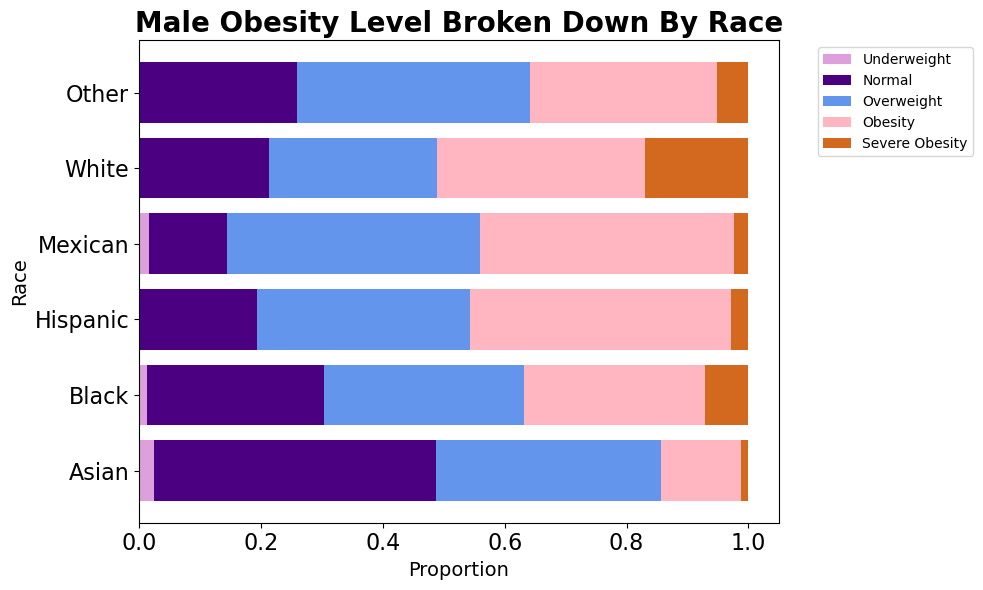

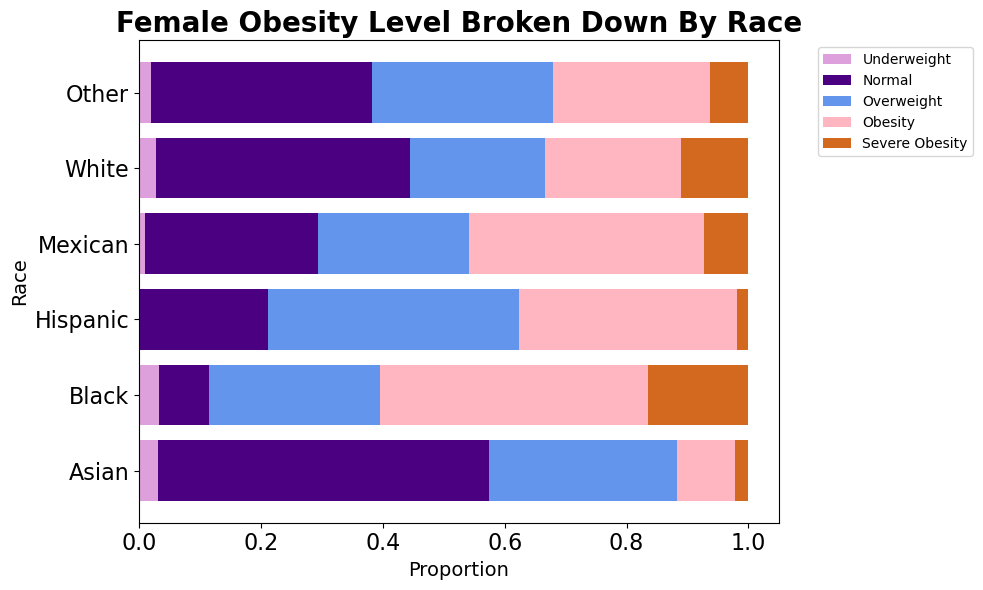

In [19]:
#Using the same NHANES dataset, we can look at obesity by race to see if there are correlations there 
#Goal: Stacked bar chart

#Create a two way frequency for male and female to see distrbution of weight classes per race per gender
male_race_two_way_frequency = pd.crosstab(index=male_nhanes_df["Obesity"], columns=nhanes["Race3"]) 
female_race_two_way_frequency = pd.crosstab(index=female_nhanes_df["Obesity"], columns=nhanes["Race3"]) 

#Turn the numbers into percentages for both male and female two way frequencies 
male_race_two_way_frequency['Asian_per'] = male_race_two_way_frequency['Asian'] / sum(male_race_two_way_frequency['Asian'])
male_race_two_way_frequency['Black_per'] = male_race_two_way_frequency['Black'] / sum(male_race_two_way_frequency['Black'])
male_race_two_way_frequency['Hispanic_per'] = male_race_two_way_frequency['Hispanic'] / sum(male_race_two_way_frequency['Hispanic'])
male_race_two_way_frequency['Mexican_per'] = male_race_two_way_frequency['Mexican'] / sum(male_race_two_way_frequency['Mexican'])
male_race_two_way_frequency['Other_per'] = male_race_two_way_frequency['Other'] / sum(male_race_two_way_frequency['Other'])
male_race_two_way_frequency['White_per'] = male_race_two_way_frequency['White'] / sum(male_race_two_way_frequency['White'])

female_race_two_way_frequency['Asian_per'] = female_race_two_way_frequency['Asian'] / sum(female_race_two_way_frequency['Asian'])
female_race_two_way_frequency['Black_per'] = female_race_two_way_frequency['Black'] / sum(female_race_two_way_frequency['Black'])
female_race_two_way_frequency['Hispanic_per'] = female_race_two_way_frequency['Hispanic'] / sum(female_race_two_way_frequency['Hispanic'])
female_race_two_way_frequency['Mexican_per'] = female_race_two_way_frequency['Mexican'] / sum(female_race_two_way_frequency['Mexican'])
female_race_two_way_frequency['Other_per'] = female_race_two_way_frequency['Other'] / sum(female_race_two_way_frequency['Other'])
female_race_two_way_frequency['White_per'] = female_race_two_way_frequency['White'] / sum(female_race_two_way_frequency['White'])

#Reindex the tables
male_race_two_way_frequency = male_race_two_way_frequency.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])
female_race_two_way_frequency = female_race_two_way_frequency.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])

#save the df as a csv file for later 
male_race_two_way_frequency.to_csv('Race_Gender_BMI_M.csv')
female_race_two_way_frequency.to_csv('Race_Gender_BMI_F.csv')

#create a stacked bar chart to compare weight statuses of men and women per race
#First male:
Race_Gender_BMI_M = pd.read_csv('Race_Gender_BMI_M.csv')
Race_Gender_BMI_M.index = Race_Gender_BMI_M["Obesity"]

Race_Gender_BMI_F = pd.read_csv('Race_Gender_BMI_F.csv')
Race_Gender_BMI_F.index = Race_Gender_BMI_F["Obesity"]


#Only get the colummns I need
Race_Gender_BMI_M = Race_Gender_BMI_M[["Asian_per", "Black_per", "Hispanic_per", "Mexican_per", "Other_per", "White_per"]]
Race_Gender_BMI_F = Race_Gender_BMI_F[["Asian_per", "Black_per", "Hispanic_per", "Mexican_per", "Other_per", "White_per"]]

#Stacked Bar Chart for Males:
with plt.style.context('default'):

    label = ['Asian', 'Black', 'Hispanic', 'Mexican', 'White', 'Other']
    y_value1 = Race_Gender_BMI_M.loc['Underweight']
    y_value2 = Race_Gender_BMI_M.loc['Normal']
    y_value3 = Race_Gender_BMI_M.loc['Overweight']
    y_value4 = Race_Gender_BMI_M.loc['Obesity']
    y_value5 = Race_Gender_BMI_M.loc['Severe Obesity']

    fig, axs = plt.subplots(figsize=(10,6)) 
    p1 = axs.barh(label, y_value1, color = "plum")     
    p2 = axs.barh(label, y_value2, left=y_value1, color = "indigo")
    p3 = axs.barh(label, y_value3, left=y_value1+y_value2, color = "cornflowerblue")
    p4 = axs.barh(label, y_value4, left=y_value1+y_value2+y_value3, color = "lightpink")
    p5 = axs.barh(label, y_value5, left=y_value1+y_value2+y_value3+
                y_value4, color = "chocolate")
    axs.set_title("Male Obesity Level Broken Down By Race", 
                  fontsize=20, fontweight="bold")   
    axs.set_xlabel("Proportion", fontsize=14)
    axs.set_ylabel("Race", fontsize=14)
    axs.tick_params(labelsize=16)  
    axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
               Race_Gender_BMI_M.index,
              bbox_to_anchor=(1.05, 1))

    fig.tight_layout()

    plt.show() 

#Stacked Bar Chart for Females:
with plt.style.context('default'):

    label = ['Asian', 'Black', 'Hispanic', 'Mexican', 'White', 'Other']
    y_value1 = Race_Gender_BMI_F.loc['Underweight']
    y_value2 = Race_Gender_BMI_F.loc['Normal']
    y_value3 = Race_Gender_BMI_F.loc['Overweight']
    y_value4 = Race_Gender_BMI_F.loc['Obesity']
    y_value5 = Race_Gender_BMI_F.loc['Severe Obesity']

    rounded_f = Race_Gender_BMI_F.loc['Obesity'].round(decimals=2)

    x = np.arange(len(label))
    height = 0.35

    fig, axs = plt.subplots(figsize=(10,6)) 
    p1 = axs.barh(label, y_value1, color = "plum")     
    p2 = axs.barh(label, y_value2, left=y_value1, color = "indigo")
    p3 = axs.barh(label, y_value3, left=y_value1+y_value2, color = "cornflowerblue")
    p4 = axs.barh(label, y_value4, left=y_value1+y_value2+y_value3, color = "lightpink")
    p5 = axs.barh(label, y_value5, left=y_value1+y_value2+y_value3+
                y_value4, color = "chocolate")

    axs.set_title("Female Obesity Level Broken Down By Race", 
                  fontsize=20, fontweight="bold")   
    axs.set_xlabel("Proportion", fontsize=14)
    axs.set_ylabel("Race", fontsize=14)
    axs.tick_params(labelsize=16)  

    axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),
               Race_Gender_BMI_F.index,
              bbox_to_anchor=(1.05, 1))

    fig.tight_layout()
    plt.show() 

In [20]:
#Here we can use a chi-squared test of independence to compare the proportion 
#Null hypothesis: There is no association between race and obesity
#Alt hypothesis: There is an association between race and obesity

new_m = male_race_two_way_frequency.drop(columns=["Asian_per","Black_per","Hispanic_per","Mexican_per","Other_per","White_per"])
new_f = female_race_two_way_frequency.drop(columns=["Asian_per","Black_per","Hispanic_per","Mexican_per","Other_per","White_per"])

#first male 
total = 0
for race_m in new_m.columns:
    total += np.sum(new_m[race_m])
print(total)

#Perform the chi-square test for males
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(new_m)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#Report: 
# Statistical analysis from chi-squared test from independence indicated
# that there was an association between male obesity level and race
# (p < 0.001).

1647
chi2: 79.55711590888302
p: 4.667303800244135e-09
dof: 20
expected: [[4.08014572e-01 7.52884032e-01 5.00303582e-01 6.07164542e-01
  2.28293868e-01 5.50333940e+00]
 [2.15227687e+01 3.97146327e+01 2.63910140e+01 3.20279296e+01
  1.20425015e+01 2.90301154e+02]
 [3.14171220e+01 5.79720704e+01 3.85233758e+01 4.67516697e+01
  1.75786278e+01 4.23757134e+02]
 [2.63679417e+01 4.86551305e+01 3.23321190e+01 3.92380085e+01
  1.47534912e+01 3.55653309e+02]
 [4.28415301e+00 7.90528233e+00 5.25318761e+00 6.37522769e+00
  2.39708561e+00 5.77850638e+01]]


In [21]:
#now female 
total = 0
for race_f in new_f.columns:
    total += np.sum(new_f[race_f])
print(total)

#Perform the chi-square test for females
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(new_f)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#Report: 
# Statistical analysis from chi-squared test from independence indicated
# that there was an association between female obesity level and race
# (p < 0.001).

1633
chi2: 137.06086372247123
p: 1.823403419544012e-19
dof: 20
expected: [[  1.89957134   3.67789345   2.20269443   2.20269443   0.72749541
   22.28965095]
 [ 30.73851806  59.51500306  35.64360073  35.64360073  11.77219841
  360.687079  ]
 [ 28.14819351  54.49969382  32.63992652  32.63992652  10.78015922
  330.29210043]
 [ 26.53643601  51.37905695  30.77097367  30.77097367  10.16289039
  311.37966932]
 [  6.67728108  12.92835273   7.74280465   7.74280465   2.55725658
   78.35150031]]


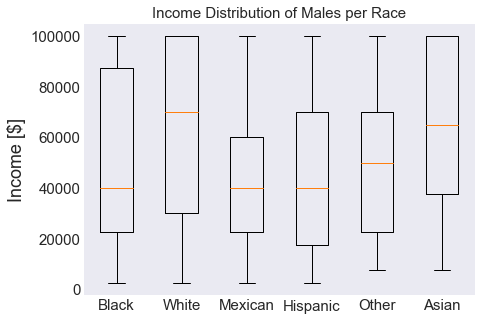

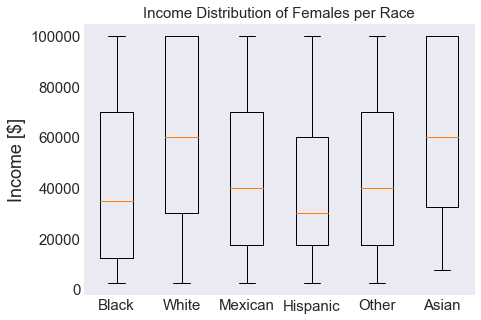

In [22]:
#Race broken down by income level 
#This will tell us if there is a correlation between income level and race 
#And we can use this information to see if there is some significance in
#obesity by race and obesity by income. Make this a comparative boxplot 

nhanes
male_nhanes_inc_df = nhanes[male_nhanes & adult & ["Race3"] & ["HHIncomeMid"]]
female_nhanes_inc_df = nhanes[female_nhanes & adult & ["Race3"] & ["HHIncomeMid"] ]

m_black = male_nhanes_inc_df["Race3"] == "Black"
m_white = male_nhanes_inc_df["Race3"] == "White"
m_mexican = male_nhanes_inc_df["Race3"] == "Mexican"
m_hispanic = male_nhanes_inc_df["Race3"] == "Hispanic"
m_other = male_nhanes_inc_df["Race3"] == "Other"
m_asian = male_nhanes_inc_df["Race3"] == "Asian"

f_black = female_nhanes_inc_df["Race3"] == "Black"
f_white = female_nhanes_inc_df["Race3"] == "White"
f_mexican = female_nhanes_inc_df["Race3"] == "Mexican"
f_hispanic = female_nhanes_inc_df["Race3"] == "Hispanic"
f_other = female_nhanes_inc_df["Race3"] == "Other"
f_asian = female_nhanes_inc_df["Race3"] == "Asian"

#creating dataframes for each race 
m_black_df = male_nhanes_inc_df[m_black & ["HHIncomeMid"]]
m_white_df = male_nhanes_inc_df[m_white & ["HHIncomeMid"]]
m_mexican_df = male_nhanes_inc_df[m_mexican & ["HHIncomeMid"]]
m_hispanic_df = male_nhanes_inc_df[m_hispanic & ["HHIncomeMid"]]
m_other_df = male_nhanes_inc_df[m_other & ["HHIncomeMid"]]
m_asian_df = male_nhanes_inc_df[m_asian & ["HHIncomeMid"]]

f_black_df = female_nhanes_inc_df[f_black & ["HHIncomeMid"]]
f_white_df = female_nhanes_inc_df[f_white & ["HHIncomeMid"]]
f_mexican_df = female_nhanes_inc_df[f_mexican & ["HHIncomeMid"]]
f_hispanic_df = female_nhanes_inc_df[f_hispanic & ["HHIncomeMid"]]
f_other_df = female_nhanes_inc_df[f_other & ["HHIncomeMid"]]
f_asian_df = female_nhanes_inc_df[f_asian & ["HHIncomeMid"]]

#create variables for boxplot 
m_black_v = m_black_df["HHIncomeMid"]
m_white_v = m_white_df["HHIncomeMid"]
m_mexican_v = m_mexican_df["HHIncomeMid"]
m_hispanic_v = m_hispanic_df["HHIncomeMid"]
m_other_v = m_other_df["HHIncomeMid"]
m_asian_v = m_asian_df["HHIncomeMid"]

f_black_v = f_black_df["HHIncomeMid"]
f_white_v = f_white_df["HHIncomeMid"]
f_mexican_v = f_mexican_df["HHIncomeMid"]
f_hispanic_v = f_hispanic_df["HHIncomeMid"]
f_other_v = f_other_df["HHIncomeMid"]
f_asian_v = f_asian_df["HHIncomeMid"]

#Boxplot for male by race by income 
with plt.style.context('seaborn-dark'):
    fig, axs = plt.subplots(figsize=(7,5))
    axs.boxplot([m_black_v, m_white_v, m_mexican_v, m_hispanic_v, m_other_v, m_asian_v])
    plt.title('Income Distribution of Males per Race', fontsize=15) 
    axs.set_xticklabels(['Black', 'White', 'Mexican', 'Hispanic', 'Other', 'Asian'])
    axs.set_ylabel('Income [$]', fontsize=18)
    axs.tick_params(labelsize=15)
    plt.show()

#Boxplot for female by race by income 
with plt.style.context('seaborn-dark'):
    fig, axs = plt.subplots(figsize=(7,5))
    axs.boxplot([f_black_v, f_white_v, f_mexican_v, f_hispanic_v, f_other_v, f_asian_v])
    plt.title('Income Distribution of Females per Race', fontsize=15) 
    axs.set_xticklabels(['Black', 'White', 'Mexican', 'Hispanic', 'Other', 'Asian'])
    axs.set_ylabel('Income [$]', fontsize=18)
    axs.tick_params(labelsize=15)
    plt.show()


In [23]:
#Is there a correlation between income and race?
#Use a chi squared test 

#Need to create a two way frequency of race and income 
m_table = pd.crosstab(index=male_nhanes_inc_df["HHIncomeMid"], columns=male_nhanes_inc_df["Race3"]) 
f_table = pd.crosstab(index=female_nhanes_inc_df["HHIncomeMid"], columns=female_nhanes_inc_df["Race3"]) 

#chi square for male
total = 0
for race_male in m_table.columns:
    total += np.sum(m_table[race_male])
print(total)

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(m_table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#chi square for female
total = 0
for race_female in f_table.columns:
    total += np.sum(f_table[race_female])
print(total)

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(f_table)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

#Observation: p value for chi sqaure test for both male and female
#is <0.0001, so there is a clear significant difference in race and
#income level broken down by gender. This could suggest a difference
#in obesity levels by race, but we cannot say that confidently. It would
#be worthwhile to dive deeper into that for another project. 

1647
chi2: 242.08518496906566
p: 2.609159544775659e-25
dof: 55
expected: [[  1.17304189   2.16454159   1.4383728    1.74559806   0.65634487
   15.82210079]
 [  1.63205829   3.01153613   2.00121433   2.42865817   0.91317547
   22.01335762]
 [  4.13114754   7.62295082   5.06557377   6.14754098   2.31147541
   55.72131148]
 [  4.33515483   7.99939284   5.31572556   6.45112325   2.42562234
   58.47298118]
 [  5.35519126   9.88160291   6.56648452   7.96903461   2.99635701
   72.23132969]
 [  8.82331512  16.28111718  10.81906497  13.12993321   4.93685489
  119.00971463]
 [  7.80327869  14.3989071    9.56830601  11.61202186   4.36612022
  105.25136612]
 [  6.73224044  12.42258652   8.25500911  10.01821494   3.76684882
   90.80510018]
 [  5.10018215   9.41105039   6.25379478   7.58955677   2.85367335
   68.79174256]
 [  5.66120219  10.44626594   6.9417122    8.42440801   3.16757741
   76.35883424]
 [ 10.30236794  19.0103218   12.63266545  15.33090468   5.76442016
  138.95931998]
 [ 22.95081967

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6216
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.431
Time:                        12:08:45   Log-Likelihood:                -5220.7
No. Observations:                1647   AIC:                         1.045e+04
Df Residuals:                    1645   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0887      0.298     97.512      0.000      28.504      29.674
x1         -3.423e-06   4.34e-06     -0.788      0.431   -1.19e-05    5.09e-06
==============================================================================
Omnibus:                      328.862   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.993
Skew:                           1.113   Prob(JB):                    7.56e-162
Kurtosis:                       5.419   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

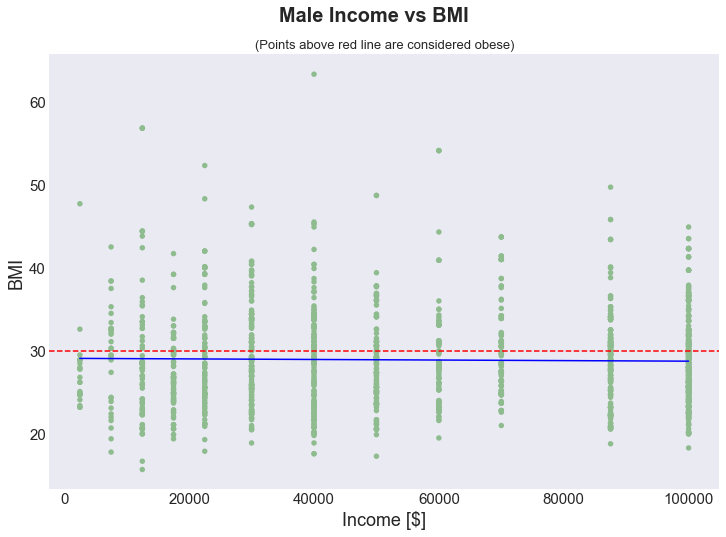

In [24]:
#Make a linear regression with income on the X axis and BMI on the Y axis to 
#to measure if there is a correlation between income level and BMI for men
#and women separately. We will use the columns HHIncomeMid and BMI

#Create the scatterplot and regression for Male 
#Adding a linear regression 
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = male_nhanes_df['HHIncomeMid'].values
y_vals = male_nhanes_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

#plotting scatterplot and linear regression
with plt.style.context('seaborn-dark'):
    fig, axs = plt.subplots(figsize=(12,8))
    axs.scatter(male_nhanes_df['HHIncomeMid'], male_nhanes_df['BMI'], c='darkseagreen',
                edgecolors='none', s=30)
    plt.suptitle("Male Income vs BMI", fontsize=20, y=.963, fontweight = "bold")
    plt.title("(Points above red line are considered obese)", fontsize=13, y=1)
    axs.set_xlabel("Income [$]", fontsize=18)
    axs.set_ylabel("BMI", fontsize=18)
    axs.tick_params(labelsize=15)
    axs.axhline(y=30, color='red', ls='dashed')

    b0 = reg_model.params[0]
    b1 = reg_model.params[1]
    x_plot = np.linspace(np.min(male_nhanes_df['HHIncomeMid']),
                         np.max(male_nhanes_df['HHIncomeMid']), 100)

    axs.plot(x_plot, x_plot*b1 + b0, color='blue')

    plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     55.20
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.75e-13
Time:                        12:08:45   Log-Likelihood:                -5479.7
No. Observations:                1633   AIC:                         1.096e+04
Df Residuals:                    1631   BIC:                         1.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7040      0.330     93.070      0.000      30.057      31.351
x1         -3.775e-05   5.08e-06     -7.430      0.000   -4.77e-05   -2.78e-05
==============================================================================
Omnibus:                      413.147   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1214.223
Skew:                           1.282   Prob(JB):                    2.16e-264
Kurtosis:                       6.357   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

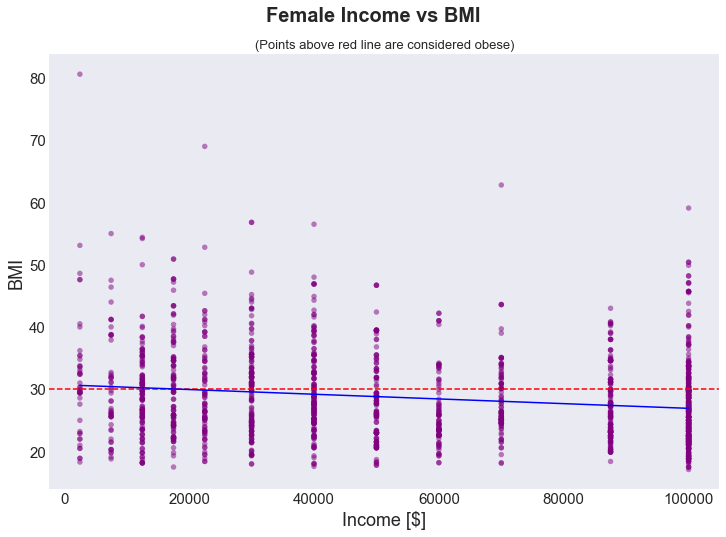

In [25]:
#Create the scatterplot and regression for Female 

#Linear Regression
x_vals = female_nhanes_df['HHIncomeMid'].values
y_vals = female_nhanes_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

#Scatterplot
with plt.style.context('seaborn-dark'):
    fig, axs = plt.subplots(figsize=(12,8))
    axs.scatter(female_nhanes_df['HHIncomeMid'], female_nhanes_df['BMI'], c='purple', alpha = 0.5,
                edgecolors='none', s=30)
    plt.suptitle("Female Income vs BMI", fontsize=20, y=.963, fontweight = "bold")
    plt.title("(Points above red line are considered obese)", fontsize=13, y=1)
    axs.set_xlabel("Income [$]", fontsize=18)
    axs.set_ylabel("BMI", fontsize=18)
    axs.tick_params(labelsize=15)
    axs.axhline(y=30, color='red', ls='dashed')

    b0 = reg_model.params[0]
    b1 = reg_model.params[1]
    x_plot = np.linspace(np.min(female_nhanes_df['HHIncomeMid']),
                         np.max(female_nhanes_df['HHIncomeMid']), 100)

    axs.plot(x_plot, x_plot*b1 + b0, color='blue')

    plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9047
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.342
Time:                        12:08:46   Log-Likelihood:                -5220.5
No. Observations:                1647   AIC:                         1.045e+04
Df Residuals:                    1645   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6386      0.292     97.918      0.000      28.065      29.212
x1             0.0815      0.086      0.951      0.342      -0.087       0.250
==============================================================================
Omnibus:                      338.919   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.929
Skew:                           1.137   Prob(JB):                    4.37e-170
Kurtosis:                       5.488   Cond. No.                         7.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

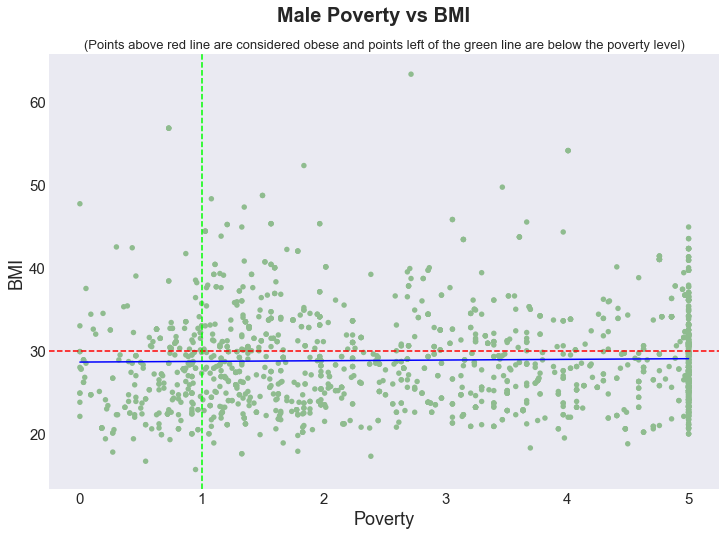

In [26]:
#Create the scatterplot and regression for Male 

#Linear Regression
x_vals = male_nhanes_df['Poverty'].values
y_vals = male_nhanes_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

#Scatterplot
with plt.style.context('seaborn-dark'):

    fig, axs = plt.subplots(figsize=(12,8))
    axs.scatter(male_nhanes_df['Poverty'], male_nhanes_df['BMI'], c='darkseagreen',
                edgecolors='none', s=30)
    plt.suptitle("Male Poverty vs BMI", fontsize=20, y=.963, fontweight = "bold")
    plt.title("(Points above red line are considered obese and points left of the green line are below the poverty level)",
              fontsize=13, y=1)
    axs.set_xlabel("Poverty", fontsize=18)
    axs.set_ylabel("BMI", fontsize=18)
    axs.tick_params(labelsize=15)
    axs.axhline(y=30, color='red', ls='dashed')
    axs.axvline(x=1, color='lime', ls='dashed')


    b0 = reg_model.params[0]
    b1 = reg_model.params[1]
    x_plot = np.linspace(np.min(male_nhanes_df['Poverty']),
                         np.max(male_nhanes_df['Poverty']), 100)

    axs.plot(x_plot, x_plot*b1 + b0, color='blue')

    plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     55.13
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.81e-13
Time:                        12:08:46   Log-Likelihood:                -5479.8
No. Observations:                1633   AIC:                         1.096e+04
Df Residuals:                    1631   BIC:                         1.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7536      0.336     91.587      0.000      30.095      31.412
x1            -0.7494      0.101     -7.425      0.000      -0.947      -0.551
==============================================================================
Omnibus:                      413.507   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1212.830
Skew:                           1.284   Prob(JB):                    4.34e-264
Kurtosis:                       6.351   Cond. No.                         6.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

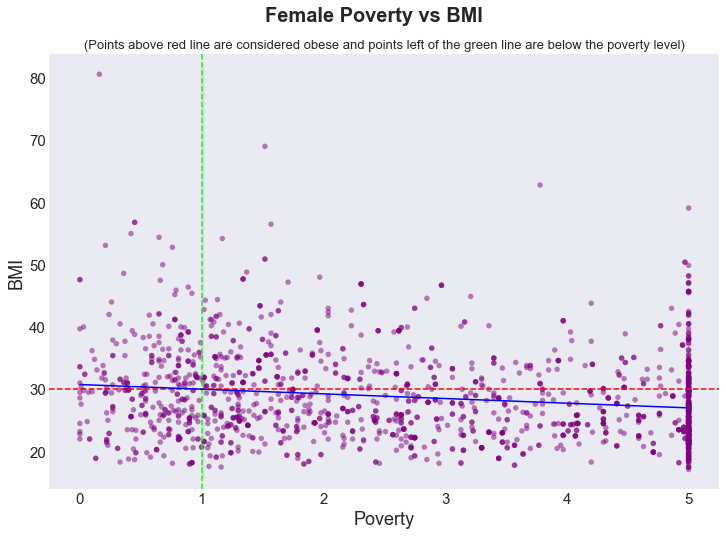

In [27]:
#I also chose to measure BMI against Poverty as another measure of how
#income could affect obesity. The follow graph portray the results. 
#Create the scatterplot and regression for Female 

#Linear Regression
x_vals = female_nhanes_df['Poverty'].values
y_vals = female_nhanes_df['BMI']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

#Scatterplot
with plt.style.context('seaborn-dark'):

    fig, axs = plt.subplots(figsize=(12,8))
    axs.scatter(female_nhanes_df['Poverty'], female_nhanes_df['BMI'], c='purple', alpha = 0.5,
                edgecolors='none', s=30)
    plt.suptitle("Female Poverty vs BMI", fontsize=20, y=.963, fontweight = "bold")
    plt.title("(Points above red line are considered obese and points left of the green line are below the poverty level)",
              fontsize=13, y=1)
    axs.set_xlabel("Poverty", fontsize=18)
    axs.set_ylabel("BMI", fontsize=18)
    axs.tick_params(labelsize=15)
    axs.axhline(y=30, color='red', ls='dashed')
    axs.axvline(x=1, color='lime', ls='dashed')


    b0 = reg_model.params[0]
    b1 = reg_model.params[1]
    x_plot = np.linspace(np.min(female_nhanes_df['Poverty']),
                         np.max(female_nhanes_df['Poverty']), 100)

    axs.plot(x_plot, x_plot*b1 + b0, color='blue')

    plt.show()

In [28]:
#The above graphs about income/poverty and BMI show a statistically significant
#correlation for females, but not for male. 